<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-07-06 12:35:59--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite.5’

survey-results-publ 100%[===================>] 201.62M  66.8MB/s    in 3.0s    

2025-07-06 12:36:04 (66.8 MB/s) - ‘survey-results-public.sqlite.5’ saved [211415040/211415040]



#### 2. Connect to the Database


**Install the needed libraries**


In [2]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 165.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 200.9 MB/s eta 0:00:00


In [3]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 153.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 162.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 102.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 160.2 MB/s eta 0:00:00


In [4]:
!pip install seaborn

In [5]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [6]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)
df.info()

   COUNT(*)
0     65437
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   COUNT(*)  1 non-null      int64
dtypes: int64(1)
memory usage: 140.0 bytes


#### Demo 2: List All Tables


In [7]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


#### Demo 3: Group Data by Age


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


In [9]:
QUERY = "SELECT * FROM main"
df = pd.read_sql_query(QUERY, conn)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB


In [10]:
df.columns.tolist()

['ResponseId',
 'MainBranch',
 'Age',
 'Employment',
 'RemoteWork',
 'Check',
 'CodingActivities',
 'EdLevel',
 'LearnCode',
 'LearnCodeOnline',
 'TechDoc',
 'YearsCode',
 'YearsCodePro',
 'DevType',
 'OrgSize',
 'PurchaseInfluence',
 'BuyNewTool',
 'BuildvsBuy',
 'TechEndorse',
 'Country',
 'Currency',
 'CompTotal',
 'LanguageHaveWorkedWith',
 'LanguageWantToWorkWith',
 'LanguageAdmired',
 'DatabaseHaveWorkedWith',
 'DatabaseWantToWorkWith',
 'DatabaseAdmired',
 'PlatformHaveWorkedWith',
 'PlatformWantToWorkWith',
 'PlatformAdmired',
 'WebframeHaveWorkedWith',
 'WebframeWantToWorkWith',
 'WebframeAdmired',
 'EmbeddedHaveWorkedWith',
 'EmbeddedWantToWorkWith',
 'EmbeddedAdmired',
 'MiscTechHaveWorkedWith',
 'MiscTechWantToWorkWith',
 'MiscTechAdmired',
 'ToolsTechHaveWorkedWith',
 'ToolsTechWantToWorkWith',
 'ToolsTechAdmired',
 'NEWCollabToolsHaveWorkedWith',
 'NEWCollabToolsWantToWorkWith',
 'NEWCollabToolsAdmired',
 'OpSysPersonal use',
 'OpSysProfessional use',
 'OfficeStackAsyncHa

## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


In [11]:
## Write your code here
mode_CompTotal = df['CompTotal'].mode()[0]
df['CompTotal'] = df['CompTotal'].fillna(mode_CompTotal)

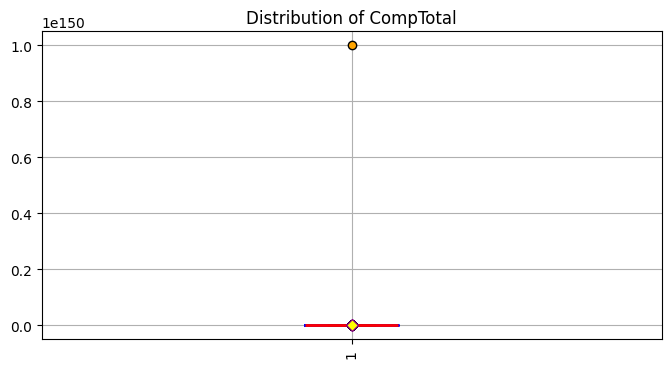

In [12]:
# your code goes here
plt.figure(figsize=(8,4))
plt.boxplot(df['CompTotal'],
            boxprops=dict(color='blue', linewidth=2),
    medianprops=dict(color='red', linewidth=2),
    whiskerprops=dict(color='green', linestyle='--'),
    capprops=dict(color='black', linewidth=1),
    flierprops=dict(marker='o', markerfacecolor='orange', markersize=6, linestyle='none'),
    meanprops=dict(marker='D', markeredgecolor='purple', markerfacecolor='yellow'),
    showmeans=True  # if you want to show the mean as well)
           )
plt.title('Distribution of CompTotal')
# plt.ticklabel_format(style='plain', axis='x') 
# plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [13]:
# Check the extreme values
print("Top 10 highest values:")
print(df['CompTotal'].nlargest(10))

print("\nBottom 10 values:")
print(df['CompTotal'].nsmallest(10))

# Filter to reasonable salary range
df_clean = df[(df['CompTotal'] >= 10000) & (df['CompTotal'] <= 1000000)]

print(f"\nOriginal data points: {len(df)}")
print(f"After cleaning: {len(df_clean)}")
print(f"Removed: {len(df) - len(df_clean)} extreme outliers")

Top 10 highest values:
14354    1.000000e+150
34278     1.000000e+65
17374     1.000000e+53
8814      1.000000e+44
20037     8.000000e+27
24677     1.000000e+20
27268     1.111111e+15
52485     3.040302e+14
46992     7.587459e+13
59887     7.777778e+12
Name: CompTotal, dtype: float64

Bottom 10 values:
697     0.0
1256    0.0
1930    0.0
2087    0.0
2290    0.0
2607    0.0
2736    0.0
3125    0.0
3962    0.0
4059    0.0
Name: CompTotal, dtype: float64

Original data points: 65437
After cleaning: 60685
Removed: 4752 extreme outliers


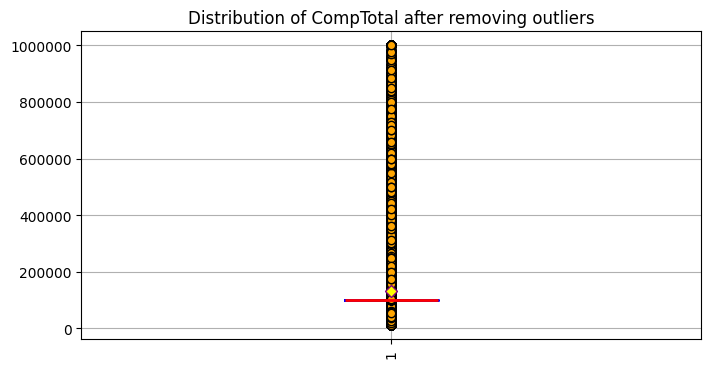

In [14]:
# your code goes here
plt.figure(figsize=(8,4))
plt.boxplot(df_clean['CompTotal'],
            boxprops=dict(color='blue', linewidth=2),
    medianprops=dict(color='red', linewidth=2),
    whiskerprops=dict(color='green', linestyle='--'),
    capprops=dict(color='black', linewidth=1),
    flierprops=dict(marker='o', markerfacecolor='orange', markersize=6, linestyle='none'),
    meanprops=dict(marker='D', markeredgecolor='purple', markerfacecolor='yellow'),
    showmeans=True  # if you want to show the mean as well)
           )
plt.title('Distribution of CompTotal after removing outliers')
plt.ticklabel_format(style='plain', axis='y') 
# plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))
plt.xticks(rotation=90)
plt.grid()
plt.show()

**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


In [15]:
# your code goes here
df_clean['Age'].value_counts()

Age
25-34 years old       21586
35-44 years old       13858
18-24 years old       13206
45-54 years old        5916
Under 18 years old     2529
55-64 years old        2506
65 years or older       762
Prefer not to say       322
Name: count, dtype: int64

In [16]:
df_clean['Age'].unique().tolist()

['Under 18 years old',
 '35-44 years old',
 '45-54 years old',
 '18-24 years old',
 '25-34 years old',
 '55-64 years old',
 'Prefer not to say',
 '65 years or older']

In [17]:
mapper_1 = {'Under 18 years old': 14,
 '35-44 years old':38,
 '45-54 years old':50,
 '18-24 years old':23,
 '25-34 years old':30,
 '55-64 years old':60,
 'Prefer not to say':None,
 '65 years or older':70}
df_clean = df_clean.copy()
df_clean['Age_numerics'] = df_clean['Age'].map(mapper_1)

df_clean['Age_numerics'].value_counts()

Age_numerics
30.0    21586
38.0    13858
23.0    13206
50.0     5916
14.0     2529
60.0     2506
70.0      762
Name: count, dtype: int64

In [18]:
import numpy as np

# Define ranges instead of single values
age_range_mapper = {
    'Under 18 years old': (13, 17),
    '18-24 years old': (18, 24),
    '25-34 years old': (25, 34),
    '35-44 years old': (35, 44),
    '45-54 years old': (45, 54),
    '55-64 years old': (55, 64),
    '65 years or older': (65, 90),
    'Prefer not to say': (np.nan, np.nan)
}

def assign_random_age(age_category):
    low, high = age_range_mapper.get(age_category, (np.nan, np.nan))
    if np.isnan(low):  # Handle 'Prefer not to say' or missing
        return np.nan
    return np.random.randint(low, high + 1)

# Apply function row-wise
df_clean['Age_numerics_random'] = df_clean['Age'].apply(assign_random_age)


In [19]:
df_clean['Age_numerics_random'].value_counts()

Age_numerics_random
28.0    2236
27.0    2207
25.0    2196
32.0    2189
26.0    2158
        ... 
79.0      26
68.0      25
73.0      24
74.0      23
82.0      19
Name: count, Length: 78, dtype: int64

In [20]:
 help(plt.subplots)

Help on function subplots in module matplotlib.pyplot:

subplots(nrows: 'int' = 1, ncols: 'int' = 1, *, sharex: "bool | Literal['none', 'all', 'row', 'col']" = False, sharey: "bool | Literal['none', 'all', 'row', 'col']" = False, squeeze: 'bool' = True, width_ratios: 'Sequence[float] | None' = None, height_ratios: 'Sequence[float] | None' = None, subplot_kw: 'dict[str, Any] | None' = None, gridspec_kw: 'dict[str, Any] | None' = None, **fig_kw) -> 'tuple[Figure, Any]'
    Create a figure and a set of subplots.

    This utility wrapper makes it convenient to create common layouts of
    subplots, including the enclosing figure object, in a single call.

    Parameters
    ----------
    nrows, ncols : int, default: 1
        Number of rows/columns of the subplot grid.

    sharex, sharey : bool or {'none', 'all', 'row', 'col'}, default: False
        Controls sharing of properties among x (*sharex*) or y (*sharey*)
        axes:

        - True or 'all': x- or y-axis will be shared amon

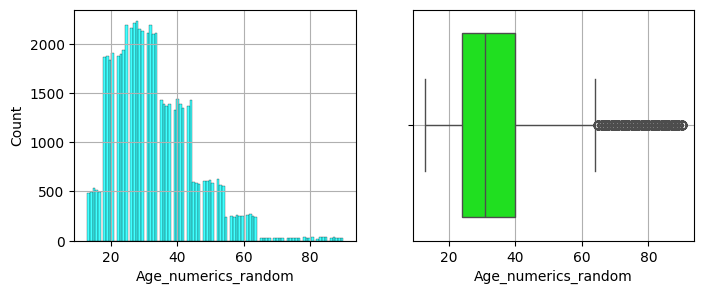

In [21]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8,3))

ax1 = sns.histplot(data = df_clean, x= 'Age_numerics_random', ax=ax1, color='cyan')

ax2 = sns.boxplot(data = df_clean, x='Age_numerics_random', ax=ax2, color='lime')

for ax in [ax1, ax2]:
    ax.grid()

plt.show()

### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


In [43]:
grouped_sum = df_clean.groupby('Age')['CompTotal'].sum()
print(type(grouped_sum))

for i in grouped_sum.index.tolist():
    print(i)

<class 'pandas.core.series.Series'>
18-24 years old
25-34 years old
35-44 years old
45-54 years old
55-64 years old
65 years or older
Prefer not to say
Under 18 years old


In [35]:
grouped = df_clean.groupby('Age')['CompTotal']

grouped 

In [36]:
grouped_data = [group.dropna() for _, group in grouped]
age_labels = [name for name, _ in grouped]

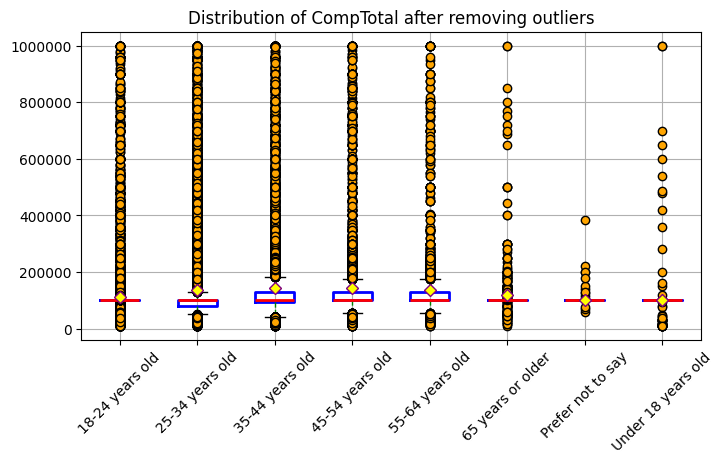

In [39]:
# your code goes here

# your code goes here
plt.figure(figsize=(8,4))
plt.boxplot(grouped_data,
            
    boxprops=dict(color='blue', linewidth=2),
    medianprops=dict(color='red', linewidth=2),
    whiskerprops=dict(color='green', linestyle='--'),
    capprops=dict(color='black', linewidth=1),
    flierprops=dict(marker='o', markerfacecolor='orange', markersize=6, linestyle='none'),
    meanprops=dict(marker='D', markeredgecolor='purple', markerfacecolor='yellow'),
    showmeans=True  # if you want to show the mean as well)
           )
plt.title('Distribution of CompTotal after removing outliers')
plt.ticklabel_format(style='plain', axis='y') 
# plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))
plt.xticks(ticks=range(1, len(age_labels)+1), labels=age_labels, rotation=45)
plt.grid()
plt.show()

**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


In [48]:
df_clean['CompTotal'].dtype

dtype('float64')

In [57]:
df_clean.select_dtypes(include='object').columns.tolist()

['MainBranch',
 'Age',
 'Employment',
 'RemoteWork',
 'Check',
 'CodingActivities',
 'EdLevel',
 'LearnCode',
 'LearnCodeOnline',
 'TechDoc',
 'YearsCode',
 'YearsCodePro',
 'DevType',
 'OrgSize',
 'PurchaseInfluence',
 'BuyNewTool',
 'BuildvsBuy',
 'TechEndorse',
 'Country',
 'Currency',
 'LanguageHaveWorkedWith',
 'LanguageWantToWorkWith',
 'LanguageAdmired',
 'DatabaseHaveWorkedWith',
 'DatabaseWantToWorkWith',
 'DatabaseAdmired',
 'PlatformHaveWorkedWith',
 'PlatformWantToWorkWith',
 'PlatformAdmired',
 'WebframeHaveWorkedWith',
 'WebframeWantToWorkWith',
 'WebframeAdmired',
 'EmbeddedHaveWorkedWith',
 'EmbeddedWantToWorkWith',
 'EmbeddedAdmired',
 'MiscTechHaveWorkedWith',
 'MiscTechWantToWorkWith',
 'MiscTechAdmired',
 'ToolsTechHaveWorkedWith',
 'ToolsTechWantToWorkWith',
 'ToolsTechAdmired',
 'NEWCollabToolsHaveWorkedWith',
 'NEWCollabToolsWantToWorkWith',
 'NEWCollabToolsAdmired',
 'OpSysPersonal use',
 'OpSysProfessional use',
 'OfficeStackAsyncHaveWorkedWith',
 'OfficeStackA

In [59]:
mode_55 = df_clean['JobSatPoints_6'].mode()[0]
df_clean['JobSatPoints_6'] = df_clean['JobSatPoints_6'].fillna(mode_55)
# df_clean['JobSatPoints_6'].unique().tolist()

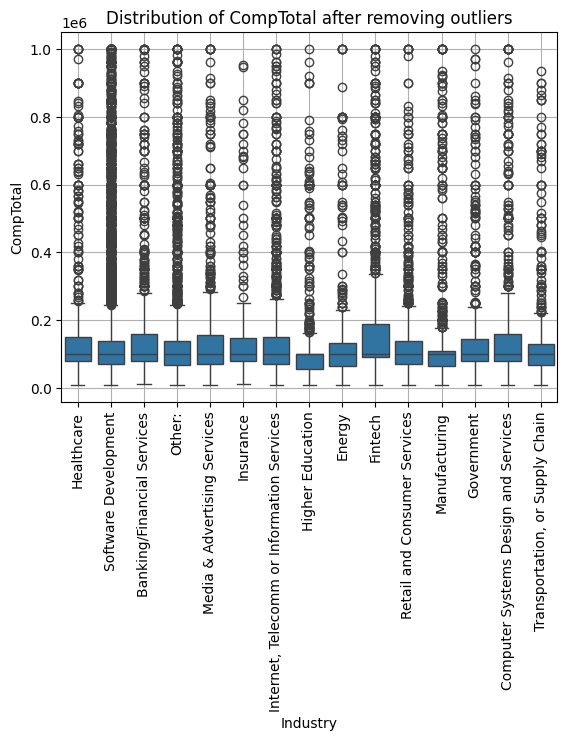

In [58]:
# your code goes here

sns.boxplot(data=df_clean, y='CompTotal', x='Industry')

plt.title('Distribution of CompTotal after removing outliers')
# plt.ticklabel_format(style='plain', axis='y') 
# plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))
plt.xticks(rotation=90)
plt.grid()
plt.show()

### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


In [70]:
top_5 = \
df_clean.DevType.value_counts().sort_values(ascending=False)[:5]

top_5_list = top_5.index.tolist()

In [72]:
df_dev = df_clean[df_clean['DevType'].isin(top_5_list)]

# df_dev

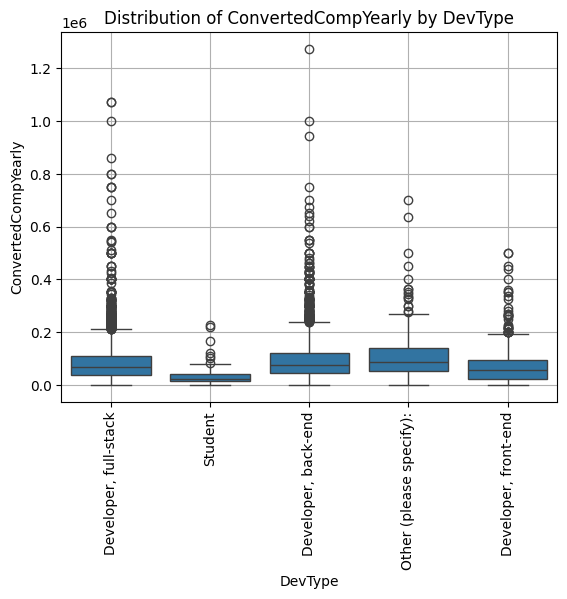

In [77]:
# your code goes here
# 'DevType'

sns.boxplot(data=df_dev, y='ConvertedCompYearly', x='DevType')

plt.title('Distribution of ConvertedCompYearly by DevType')
# plt.ticklabel_format(style='plain', axis='y') 
# plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))
plt.xticks(rotation=90)
plt.grid()
plt.show()

**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


In [75]:
top_5_countries = \
df_clean.Country.value_counts().sort_values(ascending=False)[:5]

top_5_list_countries = top_5_countries.index.tolist()

top_5_list_countries

['United States of America',
 'Germany',
 'India',
 'United Kingdom of Great Britain and Northern Ireland',
 'Ukraine']

In [76]:
df_c = df_clean[df_clean['Country'].isin(top_5_list_countries)]

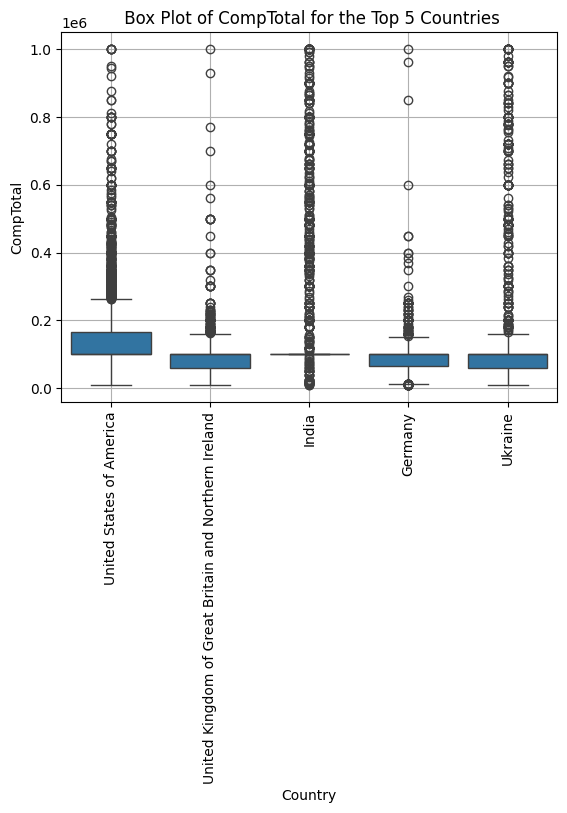

In [79]:
# your code goes here


sns.boxplot(data=df_c, y='CompTotal', x='Country')

plt.title(' Box Plot of CompTotal for the Top 5 Countries')
# plt.ticklabel_format(style='plain', axis='y') 
# plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))
plt.xticks(rotation=90)
plt.grid()
plt.show()

### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


In [82]:
df_clean['Employment'].unique().tolist()[:5]

['Employed, full-time',
 'Student, full-time',
 'Student, full-time;Not employed, but looking for work',
 'Independent contractor, freelancer, or self-employed',
 'Not employed, and not looking for work']

In [83]:
top_5_Employment = \
df_clean.Employment.value_counts().sort_values(ascending=False)[:5]

top_5_list_Employment= top_5_Employment.index.tolist()

top_5_list_Employment

['Employed, full-time',
 'Student, full-time',
 'Independent contractor, freelancer, or self-employed',
 'Employed, full-time;Independent contractor, freelancer, or self-employed',
 'Not employed, but looking for work']

In [84]:
df_Employment = df_clean[df_clean['Employment'].isin(top_5_list_Employment)]

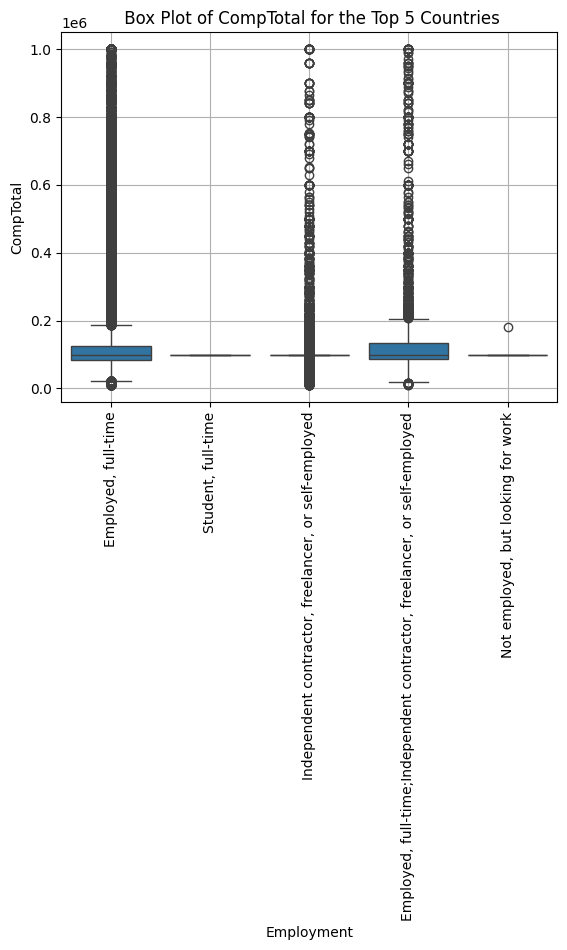

In [85]:
# your code goes here


sns.boxplot(data=df_Employment, y='CompTotal', x='Employment')

plt.title(' Box Plot of CompTotal for the Top 5 Countries')
# plt.ticklabel_format(style='plain', axis='y') 
# plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))
plt.xticks(rotation=90)
plt.grid()
plt.show()

**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


In [86]:
# your code goes here
# 'EdLevel'

top_5_EdLevel = \
df_clean.EdLevel.value_counts().sort_values(ascending=False)[:5]

top_5_list_EdLevel= top_5_EdLevel.index.tolist()

df_EdLevel = df_clean[df_clean['EdLevel'].isin(top_5_list_EdLevel)]

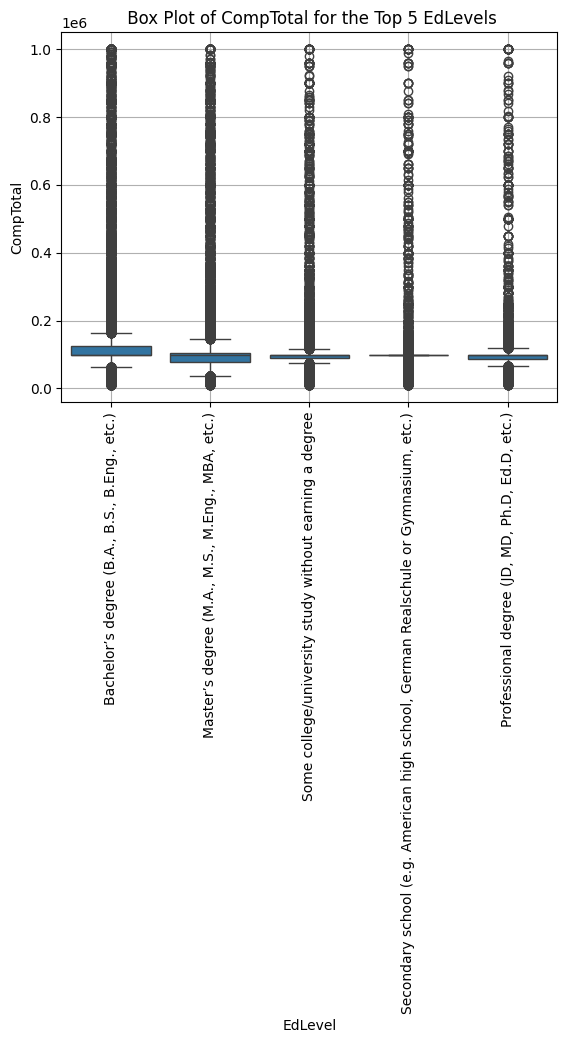

In [87]:

sns.boxplot(data=df_EdLevel, y='CompTotal', x='EdLevel')

plt.title(' Box Plot of CompTotal for the Top 5 EdLevels')
# plt.ticklabel_format(style='plain', axis='y') 
# plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))
plt.xticks(rotation=90)
plt.grid()
plt.show()

### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [28]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
